## Analysis by Flight Hour and Day

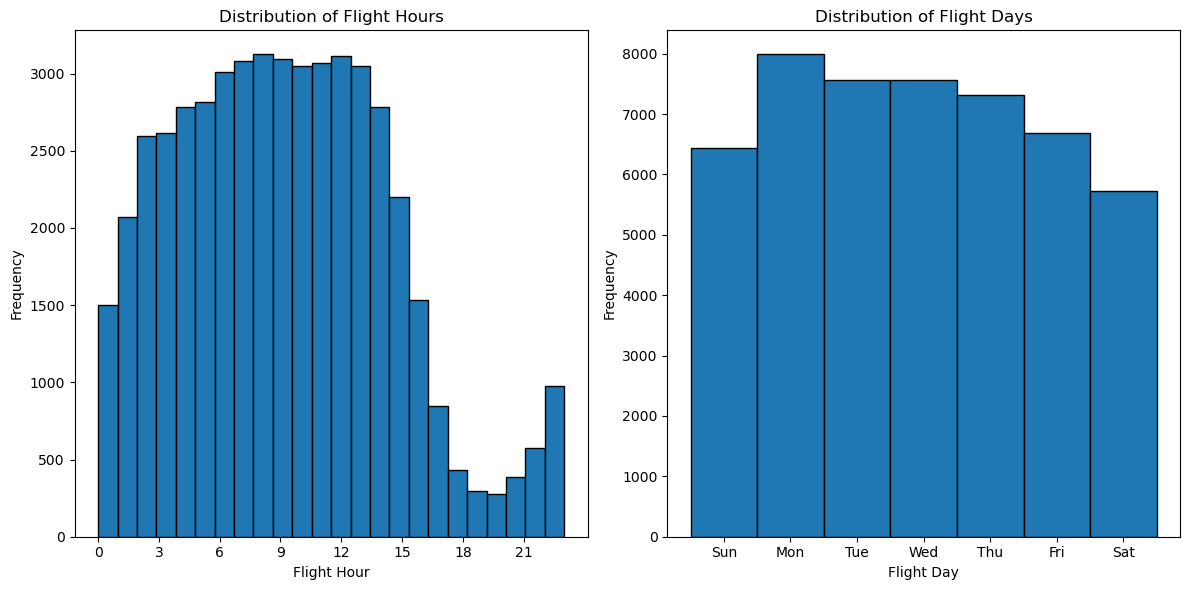

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# import dataset
df = pd.read_csv('updated_passengers.csv')

# declare variables
flight_hour_data = df['flight_hour']

# chronologically rearrange flight_day data 
days_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
flight_day_data = df['flight_day'].value_counts().reindex(days_order)

# use histogram to visualize distribution
plt.figure(figsize=(12, 6))

# histogram for flight_hour
plt.subplot(1, 2, 1)
plt.hist(flight_hour_data, bins=24, edgecolor='k')
plt.xlabel('Flight Hour')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Hours')

# set x-axis ticks at intervals of 3
plt.xticks(range(0, 24, 3))

# histogram for flight_day
plt.subplot(1, 2, 2)
plt.bar(flight_day_data.index, flight_day_data.values, width=1, edgecolor='k')
plt.xlabel('Flight Day')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Days')

# display histograms
plt.tight_layout()
plt.show()

### Rechecking Output

## Analysis of Booking Completion

In [125]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49275,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,Cambodia,1,0,1,5.62,0,PER,PNH,Australia to Cambodia
49276,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,Cambodia,0,0,0,5.62,0,PER,PNH,Australia to Cambodia
49277,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,Cambodia,0,0,1,5.62,0,PER,PNH,Australia to Cambodia
49278,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,Cambodia,1,0,1,5.62,0,PER,PNH,Australia to Cambodia


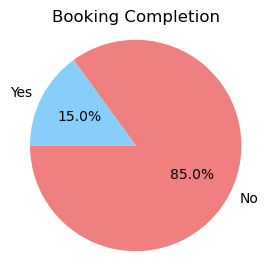

In [79]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("updated_passengers.csv")

count_no = df['booking_complete'].value_counts()[0]
count_yes = df['booking_complete'].value_counts()[1]

# Data for the pie chart
labels = ['No', 'Yes']
sizes = [count_no, count_yes]
colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)  # To emphasize the 'Yes' slice, set the 'explode' value for the 'Yes' slice to 0.1

# Create the pie chart
plt.figure(figsize=(3, 3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=180)

# Add a title
plt.title('Booking Completion')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures the pie chart appears as a circle.
plt.show()

In [85]:
count_no = df['booking_complete'].value_counts()[0]
count_yes = df['booking_complete'].value_counts()[1]

count_no, count_yes

(41888, 7392)

In [110]:
import pandas as pd

# Load the dataset using pandas
df = pd.read_csv("updated_passengers.csv")

# Count the number of occurrences with 0 under 'booking_complete' and "Internet" under 'sales_channel'
count_both1 = df[(df['booking_complete'] == 0) & (df['sales_channel'] == 'Internet')].shape[0]
count_both2 = df[(df['booking_complete'] == 1) & (df['sales_channel'] == 'Internet')].shape[0]

count_both3 = df[(df['booking_complete'] == 0) & (df['sales_channel'] == 'Mobile')].shape[0]
count_both4 = df[(df['booking_complete'] == 1) & (df['sales_channel'] == 'Mobile')].shape[0]

print("Booking incomplete and internet:", count_both1)
print("Booking complete and internet:", count_both2)
print("Booking incomplete and mobile:", count_both3)
print("Booking complete and mobile:", count_both4)

Booking incomplete and internet: 37112
Booking complete and internet: 6803
Booking incomplete and mobile: 4776
Booking complete and mobile: 589


Degrees of freedom: 1
Significance level: 0.05
Because the Chi-square test statistic is greater than the tabular value (3.841), reject the null hypothesis.
Therefore, there is no significance relationship

In [123]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset using pandas
df = pd.read_csv("updated_passengers.csv")

# Create a contingency table
contingency_table = pd.crosstab(df['booking_complete'], df['sales_channel'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square test statistic:", chi2)
print("P-value:", p_value)

# Set the significance level (alpha)
significance_level = 0.05

# Compare p-value with significance level
if p_value <= significance_level:
    print("The results are statistically significant at the", significance_level, "level.")
else:
    print("The results are not statistically significant at the", significance_level, "level.")

Chi-square test statistic: 76.00886040678569
P-value: 2.8239477004200088e-18
The results are statistically significant at the 0.05 level.


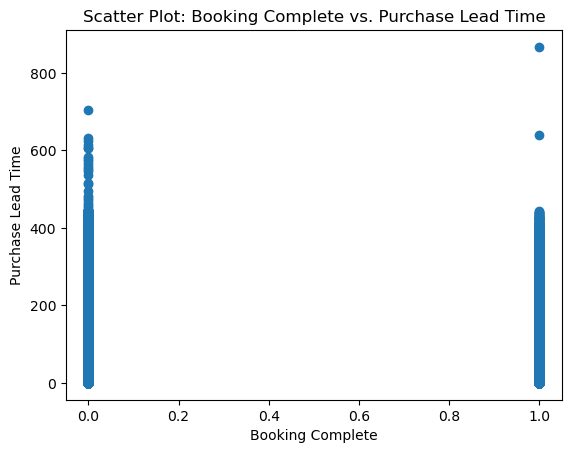

Point-Biserial Correlation Coefficient: -0.022186292753709095
P-value: 8.408536616078643e-07


In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Load the data set
data = pd.read_csv("updated_passengers.csv")

# Step 2: Calculate the point-biserial correlation
point_biserial_corr, p_value = stats.pointbiserialr(data["booking_complete"], data["purchase_lead"])

# Step 3: Create a scatter plot
plt.scatter(data["booking_complete"], data["purchase_lead"])
plt.xlabel("Booking Complete")
plt.ylabel("Purchase Lead Time")
plt.title("Scatter Plot: Booking Complete vs. Purchase Lead Time")
plt.show()

print("Point-Biserial Correlation Coefficient:", point_biserial_corr)
print("P-value:", p_value)

In [130]:
df['booking_origin'].value_counts()

Thailand        6973
Malaysia        6349
Australia       6348
Indonesia       6316
India           4732
South Korea     4022
Japan           3743
New Zealand     2790
China           2094
Sri Lanka       1277
Vietnam          954
Nepal            827
Philippines      574
Hong Kong        522
Iran             391
Bangladesh       357
Cambodia         274
Brunei           197
Mauritius        137
Singapore        116
Maldives          70
Burma             68
Taiwan            67
Macau             50
Saudi Arabia      21
Laos              11
Name: booking_origin, dtype: int64

### Conclusions

In [ ]:
'''
1. Users: internet > mobile
2. Bookings: incomplete > complete


'''